In [1]:
#Core scientific libraries
import os
import glob
import gzip
import numpy as np
import pandas as pd
import scipy
import h5py

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

#Bioinformatics
from Bio import SeqIO
import scanpy as sc
import mira

In [3]:
%config Completer.use_jedi = False

# CellRanger

In [ ]:
# scRNA
cellranger multi --localcores 46 --maxjobs 10 --id human_B_cell_scRNA_seq_220831 --csv /media/RAIDArray/JingyuFan/projects/human_B_cell/cellranger_multi_meta.csv

In [ ]:
# VDJ
cellranger multi --localcores 46 --maxjobs 10 --id human_B_cell_scRNA_seq_220905_vdj --csv /media/RAIDArray/JingyuFan/projects/human_B_cell/cellranger_multi_meta_vdj.csv

# demultiplexing

In [6]:
import h5py
import scanpy as sc


In [75]:
h5in=h5py.File('/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/per_sample_outs/human_B_cell_scRNA_seq_220831/count/sample_molecule_info.h5','r')

In [7]:

sc_data=sc.read_10x_h5('/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/per_sample_outs/human_B_cell_scRNA_seq_220831/count/sample_filtered_feature_bc_matrix.h5',
              gex_only=False)


/home/jingyu/miniconda3/envs/mira-env/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
sc_data.var_names_make_unique()

In [9]:
sc_data

AnnData object with n_obs × n_vars = 30424 × 36605
    var: 'gene_ids', 'feature_types', 'genome'

In [11]:
sc_data.var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC007325.2,ENSG00000277196,Gene Expression,GRCh38
day0,day0,Antibody Capture,
day2,day2,Antibody Capture,
day4,day4,Antibody Capture,


In [154]:
sc_data.obs['day0']=sc_data[:,('day0','day2','day4','day6')].to_df()['day0']
sc_data.obs['day2']=sc_data[:,('day0','day2','day4','day6')].to_df()['day2']
sc_data.obs['day4']=sc_data[:,('day0','day2','day4','day6')].to_df()['day4']
sc_data.obs['day6']=sc_data[:,('day0','day2','day4','day6')].to_df()['day6']

In [ ]:
sc_data[:,('day0','day2','day4','day6')]

In [155]:
sc.external.pp.hashsolo(sc_data,['day0','day2','day4','day6'],inplace=True)

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


In [156]:
sc_data.obs

,day0,day2,day4,day6,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
AAACCTGAGAATAGGG-1,1.0,22.0,113.0,2948.0,1,0,6.716711e-13,9.999991e-01,8.531679e-07,day6
AAACCTGAGACAGACC-1,1.0,15.0,107.0,3983.0,1,0,1.014719e-14,9.999995e-01,5.311655e-07,day6
AAACCTGAGACCTAGG-1,1.0,38.0,82.0,1437.0,1,0,5.182031e-09,9.999999e-01,5.635359e-08,day6
AAACCTGAGACGCAAC-1,1.0,16.0,73.0,1030.0,1,0,1.964279e-07,9.999998e-01,2.191215e-08,day6
AAACCTGAGAGCTATA-1,1.0,28.0,78.0,2678.0,1,0,2.425654e-12,1.000000e+00,3.743701e-08,day6
...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTAACCGA-1,0.0,22.0,2298.0,236.0,1,0,5.711026e-05,9.781200e-01,2.182290e-02,day4
TTTGTCATCTCAACTT-1,1.0,17.0,69.0,938.0,1,0,5.144951e-07,9.999995e-01,1.397089e-08,day6
TTTGTCATCTGCAAGT-1,4.0,721.0,79.0,1265.0,2,0,1.212994e-22,9.867560e-09,1.000000e+00,Doublet
TTTGTCATCTGCGTAA-1,0.0,23.0,70.0,2825.0,1,0,1.191328e-12,1.000000e+00,1.566471e-08,day6


In [157]:
sc_data.obs['Classification'].value_counts()

day6        17160
Doublet      5491
day4         4000
day2         3238
day0          434
Negative      101
Name: Classification, dtype: int64

In [158]:
sc_data.obs['Classification'].value_counts()/30424

day6        0.564028
Doublet     0.180483
day4        0.131475
day2        0.106429
day0        0.014265
Negative    0.003320
Name: Classification, dtype: float64

In [236]:
adata=sc.read_10x_h5('/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/per_sample_outs/human_B_cell_scRNA_seq_220831/count/sample_filtered_feature_bc_matrix.h5',
              gex_only=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [237]:
adata.var_names_make_unique()

In [169]:
adata.obs.index.tolist()==sc_data.obs.index.tolist()

True

In [174]:
adata

AnnData object with n_obs × n_vars = 30424 × 36601
    obs: 'Classification'
    var: 'gene_ids', 'feature_types', 'genome'

In [238]:
adata.obs['Classification']=sc_data.obs['Classification']

In [172]:
adata.obs

,Classification
AAACCTGAGAATAGGG-1,day6
AAACCTGAGACAGACC-1,day6
AAACCTGAGACCTAGG-1,day6
AAACCTGAGACGCAAC-1,day6
AAACCTGAGAGCTATA-1,day6
...,...
TTTGTCATCTAACCGA-1,day4
TTTGTCATCTCAACTT-1,day6
TTTGTCATCTGCAAGT-1,Doublet
TTTGTCATCTGCGTAA-1,day6


In [ ]:
# filter cells and genes
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=20)

In [240]:
adata

AnnData object with n_obs × n_vars = 30411 × 20921
    obs: 'Classification', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [242]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [179]:
adata

AnnData object with n_obs × n_vars = 30411 × 20921
    obs: 'Classification', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

... storing 'Classification' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


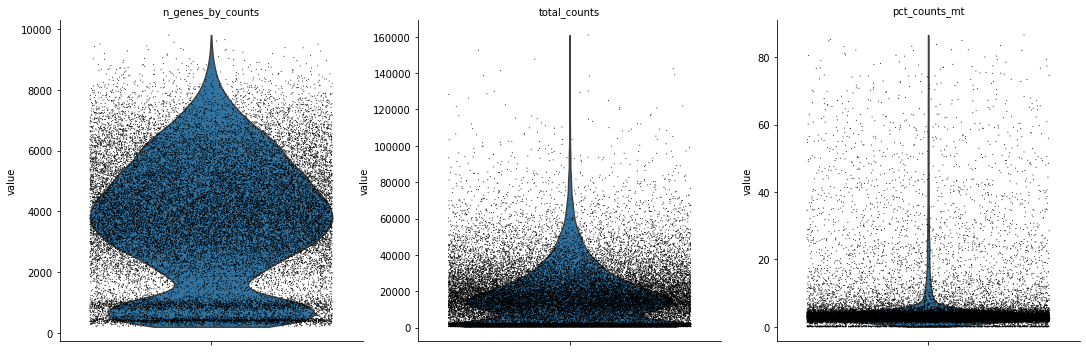

In [181]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

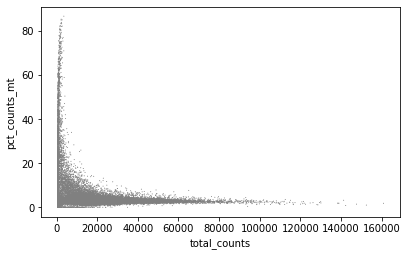

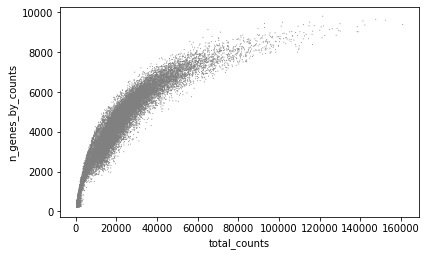

In [182]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [243]:
# filter cells with too many genes and high mitochondrial
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [187]:
adata

View of AnnData object with n_obs × n_vars = 25237 × 20921
    obs: 'Classification', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [245]:
adata.write('/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/human_B_cell_scRNA_seq_220831.h5ad')

/home/jingyu/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1236: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'Classification' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'genome' as categorical


# MIRA

In [5]:
import mira

In [5]:
adata_MIRA=sc.read_h5ad("/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/human_B_cell_scRNA_seq_220831.h5ad")

In [6]:
adata_MIRA.raw =adata_MIRA

In [7]:
sc.pp.normalize_total(adata_MIRA, target_sum=1e4)
sc.pp.log1p(adata_MIRA)

In [8]:
# define highly variable genes
sc.pp.highly_variable_genes(adata_MIRA, min_disp = 0.2)
adata_MIRA.var['exog'] = adata_MIRA.var.highly_variable.copy()

In [9]:
adata_MIRA.var['exog'].value_counts()

False    15869
True      5052
Name: exog, dtype: int64

In [9]:
adata_MIRA.var['endog'] = adata_MIRA.var.exog & (adata_MIRA.var.dispersions_norm >= 0.6)

In [11]:
adata_MIRA.var['endog'].value_counts()

False    19217
True      1704
Name: endog, dtype: int64

In [10]:
adata_MIRA.layers['counts'] = adata_MIRA.raw.to_adata().X.copy()

In [13]:
model = mira.topics.ExpressionTopicModel(
    endogenous_key='endog',
    exogenous_key='endog',
    counts_layer='counts',
    seed = 6,
    hidden=128, # to make the tutorial faster. In practice, use the default of 128!
)

In [16]:
mira.topics.ExpressionTopicModel?

In [14]:
model.get_learning_rate_bounds(adata_MIRA, eval_every=1, upper_bound_lr=5)

INFO:mira.adata_interface.topic_model:Predicting expression from genes from col: endog
INFO:mira.adata_interface.topic_model:Using highly-variable genes from col: endog


Learning rate range test:   0%|          | 0/2362 [00:00<?, ?it/s]

/home/jingyu/miniconda3/envs/mira-env/lib/python3.7/site-packages/pyro/poutine/trace_struct.py:248: UserWarning: Encountered NaN: log_prob_sum at site 'rna/obs'
  "log_prob_sum at site '{}'".format(name),
/home/jingyu/miniconda3/envs/mira-env/lib/python3.7/site-packages/pyro/infer/trace_elbo.py:158: UserWarning: Encountered NaN: loss
  warn_if_nan(loss, "loss")
ERROR:mira.topic_model.base:
Gradient overflow from too high learning rate, stopping test early.
INFO:mira.topic_model.base:Set learning rates to: (3.678794411714425e-07, 3.694594467141498)


(3.678794411714425e-07, 3.694594467141498)

<AxesSubplot:xlabel='Learning Rate', ylabel='Loss'>

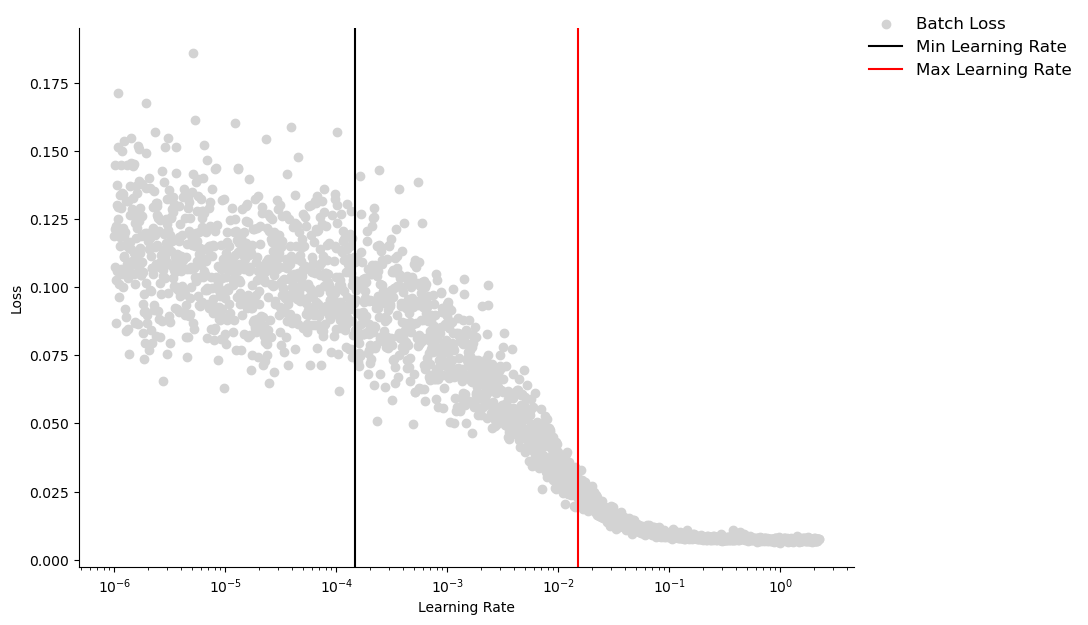

In [17]:
model.plot_learning_rate_bounds()

In [16]:
model.trim_learning_rate_bounds(6, 6)

INFO:mira.topic_model.base:Set learning rates to: (0.00014841315910257667, 0.015098963145021242)


(0.00014841315910257667, 0.015098963145021242)

In [237]:
tuner = mira.topics.TopicModelTuner(
    model,
    save_name = 'human_B_cell_scRNA_gex',
    seed = 6,
    iters=666, # Recommend 30-64 iterations of tuning.
    max_topics = 56 # to speed up convergence! Leave at default of 55 when working with new data.
)

In [24]:
mira.topics.TopicModelTuner?

In [19]:
tuner.train_test_split(adata_MIRA)

INFO:mira.adata_interface.topic_model:Added col: test_set
INFO:mira.adata_interface.core:Added cols to obs: test_set


In [244]:
tuner.select_best_model(adata_MIRA, top_n_trials=50,record_umaps=True)

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9311, 'encoder_dropout': 0.0129, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.39815e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9226, 'encoder_dropout': 0.0102, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 20}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.39655e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9094, 'encoder_dropout': 0.0102, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 21}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.39950e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9322, 'encoder_dropout': 0.0154, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40583e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9296, 'encoder_dropout': 0.0126, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 19}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9304, 'encoder_dropout': 0.0167, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 23}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40436e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9371, 'encoder_dropout': 0.0125, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 23}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40400e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9278, 'encoder_dropout': 0.0118, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40213e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9284, 'encoder_dropout': 0.0183, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 20}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40294e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9310, 'encoder_dropout': 0.0160, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 24}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40414e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9592, 'encoder_dropout': 0.0210, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 21}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40325e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9293, 'encoder_dropout': 0.0183, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 20}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40529e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9019, 'encoder_dropout': 0.0155, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 20}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40261e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9099, 'encoder_dropout': 0.0182, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 24}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

INFO:mira.topic_model.trainer:Score: 4.39895e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9325, 'encoder_dropout': 0.0171, 'kl_strategy': 'cyclic', 'num_epochs': 38, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/38 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40413e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9308, 'encoder_dropout': 0.0207, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40195e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9277, 'encoder_dropout': 0.0200, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40474e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9270, 'encoder_dropout': 0.0193, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40734e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9606, 'encoder_dropout': 0.0229, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40431e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9583, 'encoder_dropout': 0.0222, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 20}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40721e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9221, 'encoder_dropout': 0.0102, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 21}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.39883e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9290, 'encoder_dropout': 0.0132, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 23}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40239e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

INFO:mira.topic_model.trainer:Score: 4.39679e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9266, 'encoder_dropout': 0.0230, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 22}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40129e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9301, 'encoder_dropout': 0.0156, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 24}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.41061e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9438, 'encoder_dropout': 0.0144, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 2, 'num_topics': 22}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40548e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9319, 'encoder_dropout': 0.0124, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 23}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40651e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9573, 'encoder_dropout': 0.0121, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 2, 'num_topics': 18}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40259e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9312, 'encoder_dropout': 0.0200, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 23}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40299e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9495, 'encoder_dropout': 0.0199, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 3, 'num_topics': 19}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40206e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9001, 'encoder_dropout': 0.0178, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 2, 'num_topics': 22}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40604e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9546, 'encoder_dropout': 0.0188, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 2, 'num_topics': 19}


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

INFO:mira.topic_model.trainer:Score: 4.40671e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Training model with parameters: {'batch_size': 32, 'beta': 0.9658, 'encoder_dropout': 0.0101, 'kl_strategy': 'cyclic', 'num_epochs': 39, 'num_layers': 2, 'num_topics': 20}


Epoch 0:   0%|          | 0/39 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Score: 4.40525e-01


Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.topic_model.trainer:Set parameters to best combination: {'batch_size': 32, 'beta': 0.9226, 'encoder_dropout': 0.0102, 'kl_strategy': 'cyclic', 'num_epochs': 40, 'num_layers': 3, 'num_topics': 20}
INFO:mira.topic_model.trainer:Training model with all data.


Epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

ExpressionTopicModel(
  (decoder): Decoder(
    (beta): Linear(in_features=20, out_features=1704, bias=False)
    (bn): BatchNorm1d(1704, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop): Dropout(p=0.2, inplace=False)
  )
  (encoder): ExpressionEncoder(
    (fc_layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=1705, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.010205897389587758, inplace=False)
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.010205897389587758, inplace=False)
      )
      (2): Sequential(
        (0): Linear(in_features=128, out_features=42, bias=True)
        (1): BatchNorm1d(42, eps=1e-05, momentum=0.1, affine

In [245]:
tuner.model

ExpressionTopicModel(
  (decoder): Decoder(
    (beta): Linear(in_features=20, out_features=1704, bias=False)
    (bn): BatchNorm1d(1704, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop): Dropout(p=0.2, inplace=False)
  )
  (encoder): ExpressionEncoder(
    (fc_layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=1705, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.010205897389587758, inplace=False)
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.010205897389587758, inplace=False)
      )
      (2): Sequential(
        (0): Linear(in_features=128, out_features=42, bias=True)
        (1): BatchNorm1d(42, eps=1e-05, momentum=0.1, affine

In [296]:
model.save('/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/human_B_cell_scRNA_topic_model.pth')


In [15]:
model = mira.topics.ExpressionTopicModel.load('/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/human_B_cell_scRNA_topic_model_20.pth')


adata_MIRA=sc.read_h5ad("/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/human_B_cell_scRNA_seq_220831.h5ad")

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [305]:
model

ExpressionTopicModel(
  (decoder): Decoder(
    (beta): Linear(in_features=20, out_features=1704, bias=False)
    (bn): BatchNorm1d(1704, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop): Dropout(p=0.2, inplace=False)
  )
  (encoder): ExpressionEncoder(
    (fc_layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=1705, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.010205897389587758, inplace=False)
      )
      (1): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.010205897389587758, inplace=False)
      )
      (2): Sequential(
        (0): Linear(in_features=128, out_features=42, bias=True)
        (1): BatchNorm1d(42, eps=1e-05, momentum=0.1, affine

In [16]:
adata_MIRA.raw =adata_MIRA

sc.pp.normalize_total(adata_MIRA, target_sum=1e4)
sc.pp.log1p(adata_MIRA)

# sc.pp.highly_variable_genes(adata_MIRA, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(adata_MIRA, min_disp = 0.2)
adata_MIRA.var['exog'] = adata_MIRA.var.highly_variable.copy()

adata_MIRA.var['endog'] = adata_MIRA.var.exog & (adata_MIRA.var.dispersions_norm >= 0.6)

adata_MIRA.layers['counts'] = adata_MIRA.raw.to_adata().X.copy()



In [17]:
model.predict(adata_MIRA)

Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


In [308]:
adata_MIRA

AnnData object with n_obs × n_vars = 25237 × 20921
    obs: 'Classification', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'exog', 'endog'
    uns: 'log1p', 'hvg', 'topic_dendogram'
    obsm: 'X_topic_compositions'
    varm: 'topic_feature_compositions', 'topic_feature_activations'
    layers: 'counts'

Predicting latent vars:   0%|          | 0/50 [00:00<?, ?it/s]

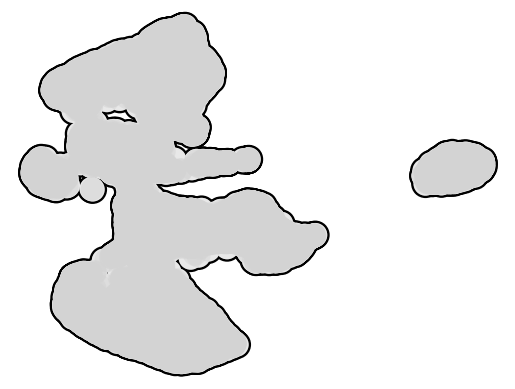

In [247]:
model.predict(adata_MIRA)
model.get_umap_features(adata_MIRA, box_cox=0.5)
sc.pp.neighbors(adata_MIRA, use_rep = 'X_umap_features', metric = 'manhattan')
sc.tl.umap(adata_MIRA, min_dist=0.1, negative_sample_rate=5)

sc.pl.umap(adata_MIRA, frameon=False, size = 1200, alpha = 0.5, add_outline=True,
          outline_width=(0.1,0))

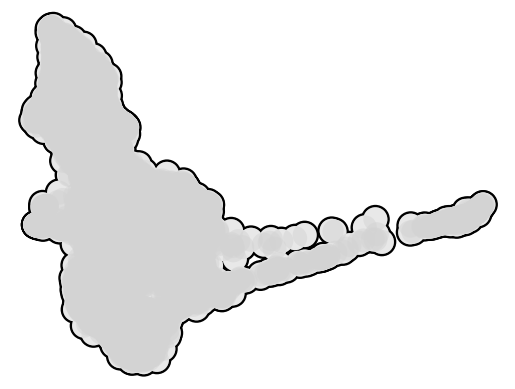

In [25]:
sc.pl.umap(adata_MIRA, frameon=False, size = 1200, alpha = 0.5, add_outline=True,
          outline_width=(0.1,0))

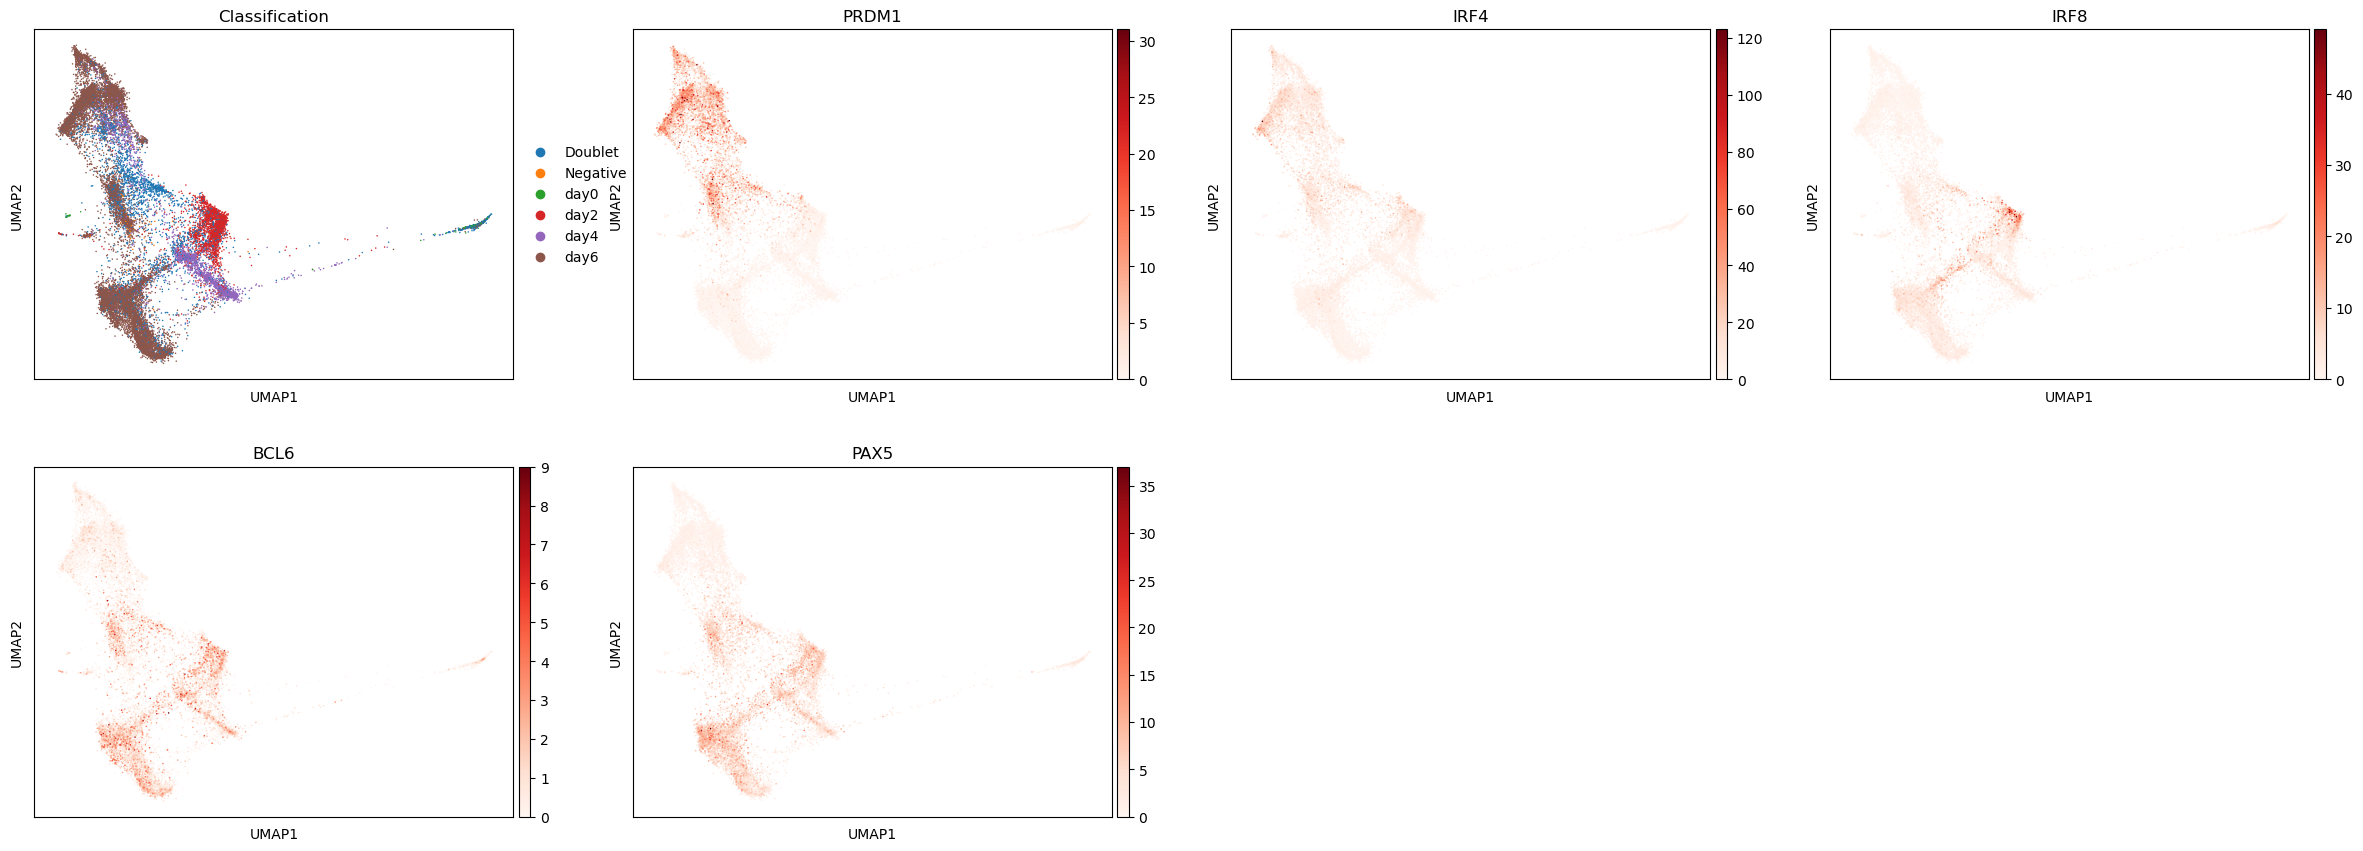

In [26]:
sc.pl.umap(adata_MIRA, color=['Classification','PRDM1', 'IRF4', 'IRF8',"BCL6","PAX5"],color_map='Reds')

In [18]:
model.get_umap_features(adata_MIRA, box_cox=0.1)
sc.pp.neighbors(adata_MIRA, use_rep = 'X_umap_features', metric = 'manhattan',n_neighbors=10)
sc.tl.umap(adata_MIRA, min_dist=0.1, negative_sample_rate=5,random_state=0)
adata_MIRA.obsm['X_umap'][:,0]=-adata_MIRA.obsm['X_umap'][:,0]
adata_MIRA.obsm['X_umap'][:,1]=-adata_MIRA.obsm['X_umap'][:,1]

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features


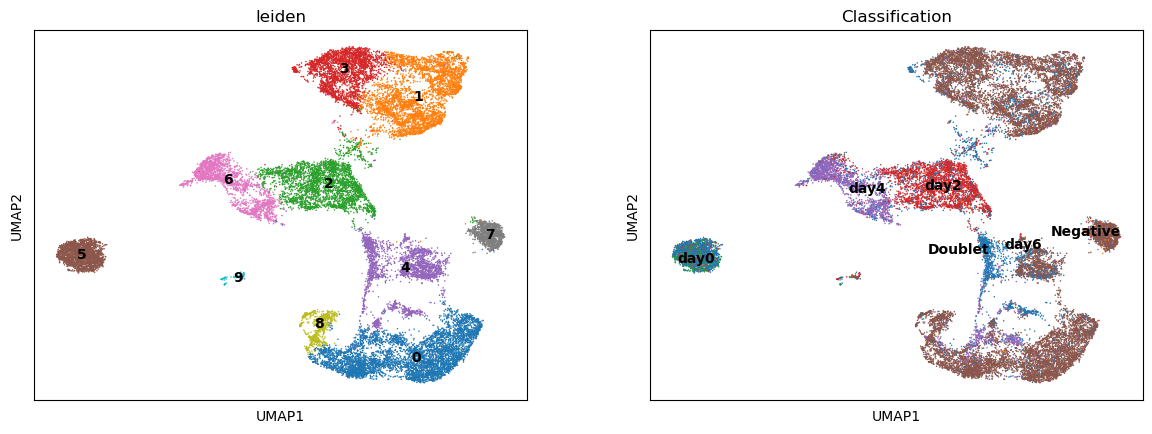

In [26]:
sc.pl.umap(adata_MIRA, 
           color=['leiden','Classification'],
           color_map='Reds',
           legend_loc='on data'
          )

In [ ]:
adata_MIRA.write('/media/RAIDArray/JingyuFan/projects/human_B_cell/scRNA_220830/human_B_cell_scRNA_seq_220831/outs/human_B_cell_scRNA_seq_230327.umap.leiden_clusters.h5ad')